In [36]:
%matplotlib inline

import json
import codecs

import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

In [3]:
g = nx.read_gexf("datasets/influences.philosophersonly.gexf")

In [6]:
df = pd.DataFrame.from_csv("datasets/dates.birthdeath.csv")

df.head(5)

,birthyear,birthdate,deathyear
name,,,
Syed_Abdul_Hakim,1874.0,NaN,1944.0
Moses_ibn_Ezra,1055.0,NaN,1138.0
Francisco_Sanches,1550.0,NaN,1623.0
Sibawayh,760.0,NaN,796.0
Solomon_ibn_Gabirol,1021.0,NaN,1058.0


In [69]:
base = list(set(g.nodes()) & set(df[ df["birthyear"].notnull() | df["deathyear"].notnull() ].index))

print len(base)

849


In [71]:
df_base = df.loc[base]

In [72]:
df_base.head()

,birthyear,birthdate,deathyear
name,,,
Bonaventure__Bonaventure__1,1221.0,NaN,1274.0
Muhammad_Mustafa_Jauhar,1895.0,1895-05-10,1985.0
Leonardo_Polo,1926.0,1926-02-01,2013.0
Julian_Savulescu,1963.0,1963-12-22,NaN
Francis_Fukuyama,1952.0,1952-10-27,NaN


In [73]:
A = nx.to_numpy_matrix(g.subgraph(df_base.index))

In [74]:
from sklearn.decomposition import PCA

In [119]:
pca = PCA().fit(A)

In [120]:
Y = pca.transform(A)
Y = zip(*Y)

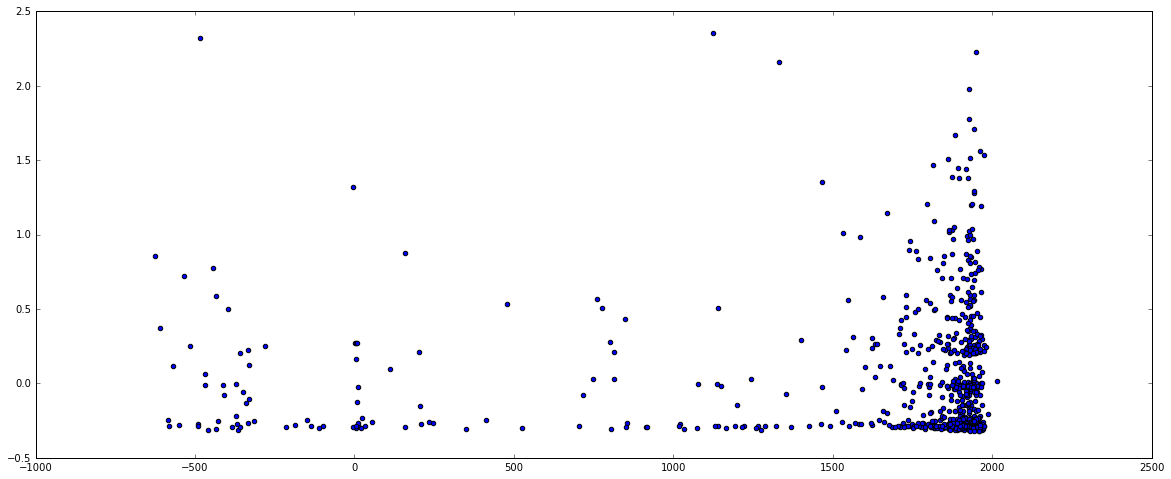

In [121]:
x = list(df_base["birthyear"])
y = Y[0]

time_periods = [[-750, 1000],[1000, 1900],[1900, 2000]]

plt.figure(figsize=(20,8))
plt.scatter(x, y)
plt.show()

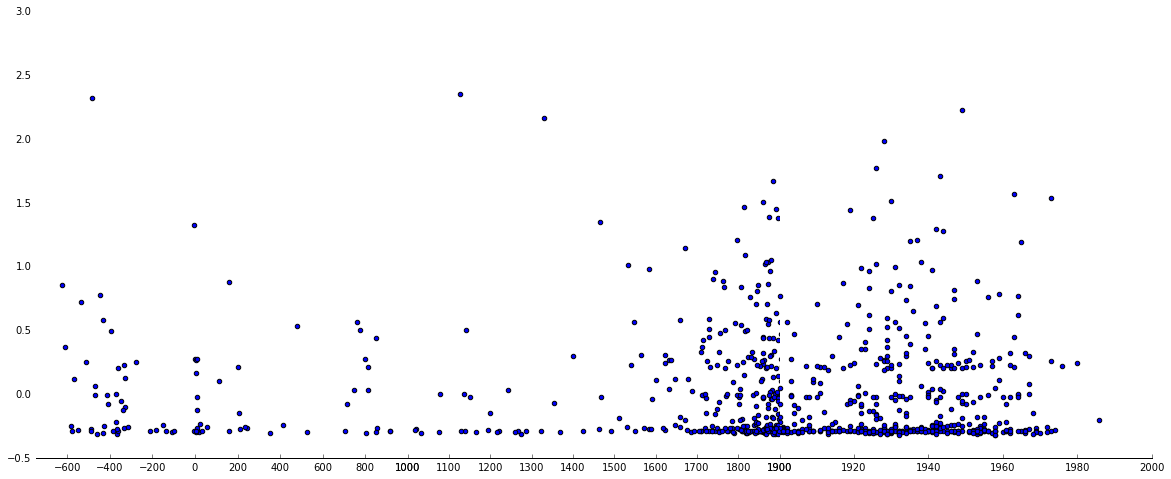

In [111]:
x = list(df_base["birthyear"])
y = Y[0]

time_periods = [[-750, 1000],[1000, 1900],[1900, 2000]]

plt.figure(figsize=(20,8))

f, ax = plt.subplots(1, 3, sharex=False, sharey=True, figsize=(20,8))

for i, time_period in enumerate(time_periods):
  ax[i].scatter(x,y)
  
  ax[i].set_xlim(time_period[0], time_period[1])
  
  ax[i].spines['right'].set_visible(False)
  ax[i].spines['left'].set_visible(False)
  ax[i].spines['top'].set_visible(False)
  ax[i].xaxis.set_ticks_position('bottom') 
  ax[i].yaxis.set_ticks_position('none') 

# f.tight_layout()
f.subplots_adjust(wspace=0)
plt.show()

In [37]:
communities = json.load(codecs.open("datasets/communities/louvain.json", "r", "utf-8"))

In [44]:
def get_community(n, communities):
  for community in communities:
    if n in communities[community]:
      return community
    
  return -1

c = [ get_community(n, communities) for n in df_base.index ]

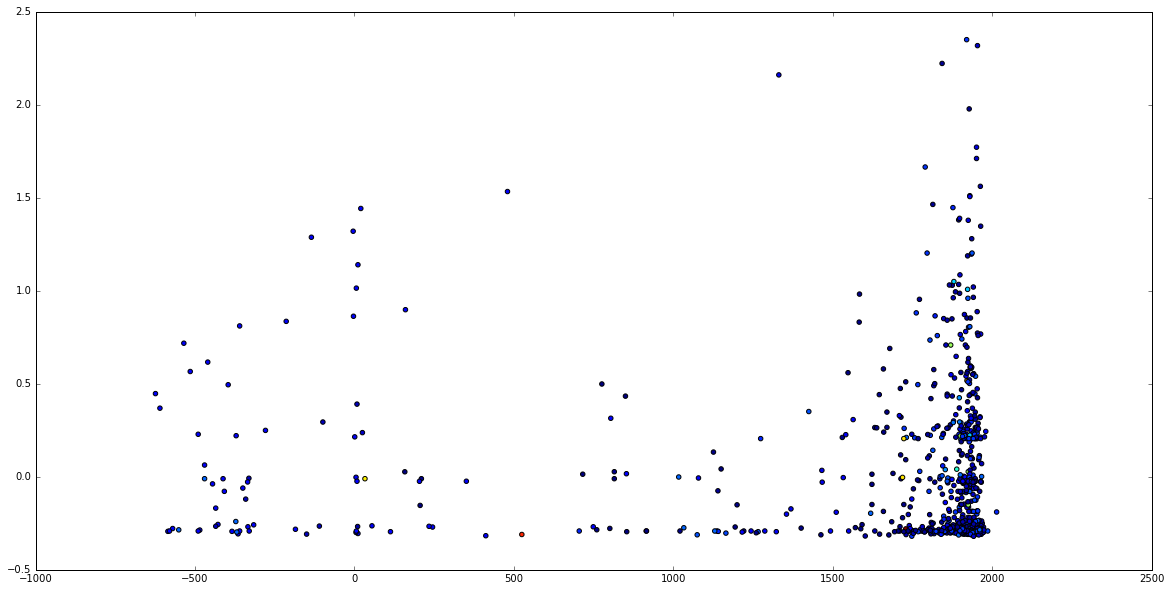

In [46]:
fig = plt.figure(figsize=(20,10))

plt.scatter(x , y, c=c)

plt.show()